In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
data_dir = 'ecom_Images_dataset/'

# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255
)
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    'ecom_Images_dataset/train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    'ecom_Images_dataset/val/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_generator = train_datagen.flow_from_directory(
    'ecom_Images_dataset/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 3100 images belonging to 13 classes.
Found 385 images belonging to 13 classes.
Found 392 images belonging to 13 classes.


In [55]:
train_generator.class_indices.keys()

dict_keys(['Baby and Kids', 'Excercise and Fitness', 'Food Essentials', 'Footwear', 'Furnitures', 'Home and Kitchen Appliances', 'Mens fashion', 'New folder', 'Sports', 'Stationery', 'Womens fashion', 'electronics', 'mobiles and laptops'])

In [29]:
class_names=['Baby and Kids', 'electronics', 'Excercise and Fitness', 'Food Essentials', 'Footwear', 'Furnitures', 'Home and Kitchen Appliances', 'Mens fashion', 'mobiles and laptops', 'Sports', 'Stationery', 'Womens fashion']


In [46]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(13, activation='softmax'))

In [47]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [49]:
batch_size = 32
train_steps_per_epoch = len(train_generator)

with tf.device('GPU:0'):
    model.fit(train_generator, steps_per_epoch=train_steps_per_epoch,validation_data=val_generator, epochs=30)


Epoch 1/30
97/97 [==============================] - 58s 591ms/step - loss: 2.3670 - accuracy: 0.1839 - val_loss: 2.2478 - val_accuracy: 0.2260
Epoch 2/30
97/97 [==============================] - 60s 614ms/step - loss: 2.1352 - accuracy: 0.2781 - val_loss: 2.0382 - val_accuracy: 0.2935
Epoch 3/30
97/97 [==============================] - 54s 557ms/step - loss: 1.9927 - accuracy: 0.3287 - val_loss: 1.9678 - val_accuracy: 0.3429
Epoch 4/30
97/97 [==============================] - 58s 602ms/step - loss: 1.8825 - accuracy: 0.3687 - val_loss: 1.9241 - val_accuracy: 0.3506
Epoch 5/30
97/97 [==============================] - 65s 666ms/step - loss: 1.8096 - accuracy: 0.3761 - val_loss: 1.8079 - val_accuracy: 0.3740
Epoch 6/30
97/97 [==============================] - 86s 892ms/step - loss: 1.7368 - accuracy: 0.4058 - val_loss: 1.7134 - val_accuracy: 0.4312
Epoch 7/30
97/97 [==============================] - 86s 884ms/step - loss: 1.7003 - accuracy: 0.4258 - val_loss: 1.6657 - val_accuracy: 0.4442

In [50]:
with tf.device('GPU:0'):
    model.fit(train_generator, steps_per_epoch=train_steps_per_epoch,validation_data=val_generator, epochs=50)


Epoch 1/50
97/97 [==============================] - 63s 647ms/step - loss: 1.0097 - accuracy: 0.6571 - val_loss: 1.3017 - val_accuracy: 0.5688
Epoch 2/50
97/97 [==============================] - 86s 888ms/step - loss: 0.9969 - accuracy: 0.6623 - val_loss: 1.3717 - val_accuracy: 0.5818
Epoch 3/50
97/97 [==============================] - 71s 736ms/step - loss: 0.9815 - accuracy: 0.6645 - val_loss: 1.3271 - val_accuracy: 0.5870
Epoch 4/50
97/97 [==============================] - 71s 731ms/step - loss: 0.9507 - accuracy: 0.6729 - val_loss: 1.3615 - val_accuracy: 0.5636
Epoch 5/50
97/97 [==============================] - 73s 752ms/step - loss: 0.9884 - accuracy: 0.6697 - val_loss: 1.3298 - val_accuracy: 0.5766
Epoch 6/50
97/97 [==============================] - 72s 738ms/step - loss: 0.9406 - accuracy: 0.6723 - val_loss: 1.2434 - val_accuracy: 0.6026
Epoch 7/50
97/97 [==============================] - 62s 636ms/step - loss: 0.9419 - accuracy: 0.6832 - val_loss: 1.3995 - val_accuracy: 0.5922

KeyboardInterrupt: 

In [52]:
model.predict(test_generator)

13/13 [==============================] - 7s 503ms/step


array([[1.5087245e-04, 3.2942338e-05, 9.5647185e-05, ..., 3.7726655e-04,
        9.5508585e-04, 1.1375917e-05],
       [6.3598841e-01, 1.4093019e-03, 8.7721245e-03, ..., 8.5921693e-07,
        2.0711515e-03, 2.6223478e-03],
       [1.7979655e-03, 3.6790514e-01, 1.6398826e-07, ..., 2.3477658e-06,
        4.2433262e-01, 1.8299563e-01],
       ...,
       [9.9770254e-01, 4.4677854e-08, 3.9699679e-04, ..., 6.0790417e-09,
        1.1122603e-05, 5.5838245e-05],
       [9.6843769e-07, 9.9913377e-01, 8.4084615e-09, ..., 1.2432408e-05,
        6.3310901e-04, 2.7330437e-08],
       [8.7710231e-04, 3.8787778e-02, 2.0275207e-04, ..., 2.5387082e-05,
        2.7173033e-01, 1.1090540e-01]], dtype=float32)

In [53]:
model.save('productPrediction.h5')

In [4]:
model = tf.keras.models.load_model('productPrediction.h5')

In [7]:
model.predict(train_generator)

97/97 [==============================] - 53s 549ms/step


array([[0.07521085],
       [0.07253736],
       [0.07462882],
       ...,
       [0.07725676],
       [0.07650351],
       [0.0768952 ]], dtype=float32)

In [12]:
for i in train_generator[0][0]:

array([[[[0.9176471 , 0.8862746 , 0.7960785 ],
         [0.9176471 , 0.8862746 , 0.7960785 ],
         [0.9176471 , 0.8862746 , 0.7960785 ],
         ...,
         [0.9391634 , 0.915634  , 0.86857516],
         [0.94117653, 0.9176471 , 0.8705883 ],
         [0.94117653, 0.9176471 , 0.8705883 ]],

        [[0.9176471 , 0.8862746 , 0.7960785 ],
         [0.9176471 , 0.8862746 , 0.7960785 ],
         [0.9176471 , 0.8862746 , 0.7960785 ],
         ...,
         [0.93826246, 0.91473305, 0.86767423],
         [0.94117653, 0.9176471 , 0.8705883 ],
         [0.94117653, 0.9176471 , 0.8705883 ]],

        [[0.9176471 , 0.8862746 , 0.7960785 ],
         [0.9176471 , 0.8862746 , 0.7960785 ],
         [0.9176471 , 0.8862746 , 0.7960785 ],
         ...,
         [0.93736154, 0.9138321 , 0.8667733 ],
         [0.94117653, 0.9176471 , 0.8705883 ],
         [0.94117653, 0.9176471 , 0.8705883 ]],

        ...,

        [[0.45098042, 0.40784317, 0.47058827],
         [0.45098042, 0.40784317, 0.47058827]

32


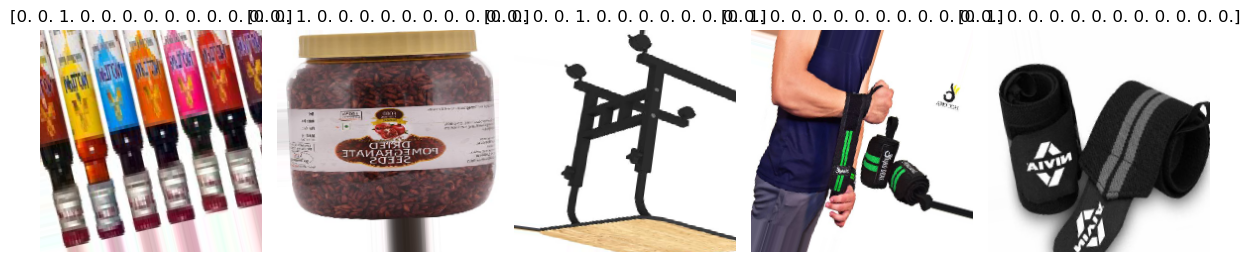

In [22]:
import matplotlib.pyplot as plt

# Assuming you have a train generator named 'train_generator'

# Set the number of images you want to plot
num_images = 5

# Get a batch of image and label pairs from the train generator
image_batch, label_batch = next(train_generator)

print(len(label_batch))
# Plot the images and labels
fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(12, 4))

for i in range(num_images):
    image = image_batch[i]
    label = label_batch[i]
    
    axes[i].imshow(image)
    axes[i].set_title(label)
    axes[i].axis('off')

plt.tight_layout()
plt.show()
